In [2]:
import numpy as np
import time
from scipy.fft import fftshift
import matplotlib.pyplot as plt
from skimage import data, img_as_float

# Erstellen eines Gaußschen Filters im Frequenzbereich

In [3]:
def create_gaussian_filter(shape, sigma=10):
    x = np.linspace(-shape[0]//2, shape[0]//2, shape[0])
    y = np.linspace(-shape[1]//2, shape[1]//2, shape[1])
    x, y = np.meshgrid(x, y)
    d = np.sqrt(x**2 + y**2)
    gaussian = np.exp(-(d**2 / (2.0 * sigma**2)))
    return gaussian

# FFT Implemtierung

In [4]:
# Maximale Framezahl
FRAME_SIZE = 1024

# Berechne die Faktoren fuer die Kombination
EXP_FACTOR_FFT_LOOK_UP = [np.exp(-2j * np.pi * np.arange(N // 2) / N) for N in range(FRAME_SIZE + 1)]
EXP_FACTOR_IFFT_LOOK_UP = [np.exp(2j * np.pi * np.arange(N // 2) / N) for N in range(FRAME_SIZE + 1)]

# Rekursive FFT Implementierung für 1D Arrays
def fft(x):
    N = x.shape[0]  # N ist die Laenge von x
    
    # Falls x nur aus einem Element besteht gebe x zurueck
    if N == 1: return x

    # Teile a in gerade und ungerade Elemente und berechne deren FFT
    fft_even = fft(x[0::2])
    fft_odd = fft(x[1::2])

    # Führe die Butterfly Operation durch
    exp_mult_fft_odd = EXP_FACTOR_FFT_LOOK_UP[N] * fft_odd
    butterfly = np.concatenate([fft_even + exp_mult_fft_odd, fft_even - exp_mult_fft_odd])
        
    return butterfly

# Rekursive Idft Implementierung für 1D Arrays
def ifft(x):
    N = x.shape[0]  # N ist die Länge von x
    
    # Falls x nur aus einem Element besteht, gebe x zurück
    if N == 1: return x

    # Teile x in gerade und ungerade Elemente und berechne deren IFFT
    ifft_even = ifft(x[0::2])
    ifft_odd = ifft(x[1::2])
    
    # Führe die Butterfly Operation durch
    exp_mult_ifft_odd = EXP_FACTOR_IFFT_LOOK_UP[N] * ifft_odd
    butterfly = np.concatenate([ifft_even + exp_mult_ifft_odd, ifft_even - exp_mult_ifft_odd])
    
    # Am Ende der IFFT muss jede Komponente durch N dividiert werden
    return butterfly / N

# 2D FFT Implementierung
def fft2(image):
    fft_rows = np.array([fft(row) for row in image])
    fft_image = np.array([fft(col) for col in fft_rows.T]).T
    return fft_image

# 2D IFFT Implementierung
def ifft2(image):
    ifft_rows = np.array([ifft(row) for row in image])
    ifft_image = np.array([ifft(col) for col in ifft_rows.T]).T
    return ifft_image

# DFT Implementierung

In [5]:
# Direkte Implementierung der DFT für 1D Arrays
def dft(x):
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

# Direkte Implementierung der IDFT für 1D Arrays
def idft(x):
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    return np.dot(e, x) / N

# 2D DFT Implementierung
def dft2(image):
    M, N = image.shape
    dft_rows = np.array([dft(row) for row in image])
    dft_image = np.array([dft(col) for col in dft_rows.T]).T
    return dft_image

# 2D IDFT Implementierung
def idft2(image):
    M, N = image.shape
    idft_rows = np.array([idft(row) for row in image])
    idft_image = np.array([idft(col) for col in idft_rows.T]).T
    return idft_image

# Bild laden und in Fließkommazahlen umwandeln

In [9]:
image = img_as_float(data.camera())

# Berechnung mittels FFT Algorithmus

In [10]:
start_time = time.time()

# FFT des Bildes
fft_image = fft2(image)
fft_image_shifted = fftshift(fft_image)

# Anwenden des Filters durch Multiplikation im Frequenzbereich
filtered_fft = fft_image_shifted * create_gaussian_filter(image.shape)

# Rücktransformation in den Bildbereich
filtered_image = ifft2(fftshift(filtered_fft)).real

#time tracking
duration = time.time() - start_time

print("Duration FFT: ", duration)

Duration FFT:  4.042773962020874


# Anzeigen des Originalbildes und des gefilterten Bildes

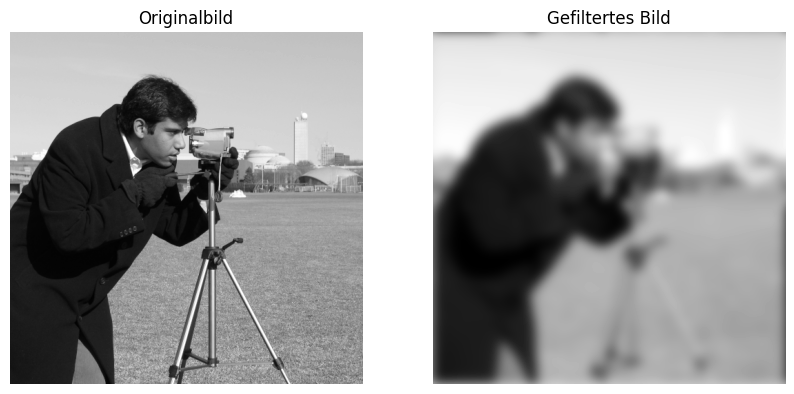

In [11]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Originalbild')
ax[0].axis('off')
ax[1].imshow(filtered_image, cmap='gray')
ax[1].set_title('Gefiltertes Bild')
ax[1].axis('off')
plt.show()

# Berechnung mittels DFT Algorithmus

In [ ]:
start_time = time.time()

# DFT des Bildes
dft_image = dft2(image)
dft_image_shifted = fftshift(dft_image)

# Anwenden des Filters durch Multiplikation im Frequenzbereich
filtered_dft = dft_image_shifted * create_gaussian_filter(image.shape)

# Rücktransformation in den Bildbereich
filtered_image = idft2(fftshift(filtered_dft)).real

#time tracking
duration = time.time() - start_time

print("Duration DFT: ", duration)

# Anzeigen des Originalbildes und des gefilterten Bildes

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Originalbild')
ax[0].axis('off')
ax[1].imshow(filtered_image, cmap='gray')
ax[1].set_title('Gefiltertes Bild')
ax[1].axis('off')
plt.show()